In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import signal

Stack overflow links (cross corr between images): https://stackoverflow.com/questions/22269627/cross-correlation-between-two-images
Stack overflow link (Image interpretation): https://dsp.stackexchange.com/questions/45968/image-cross-correlation-interpretation

GOAL: metric of some sort of matchiness



Helpful snippets of code from other labs

To create an image; an array of black pixels, use 0 for black pixels and 1 for white pixels.

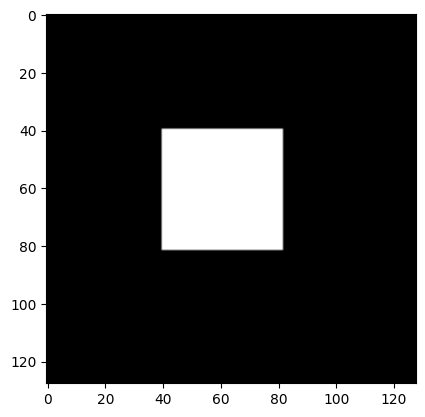

In [34]:
# Create I with 128x128 zeros
I = np.zeros((128, 128))   # create an array of zeros, first number is number or rows, second is number of columns
I[40:82, 40:82] = 1 # this alters the white sqaure added, makes it so pixels 40 to 82 are white 
# Display your I, using its vmin and vmax value in gray scale.
plt.imshow(I, cmap="gray", vmin = np.min(I), vmax = np.max(I)) # cmap = color map, "vmin" - , "vmax" - 

Examples of filtering images:

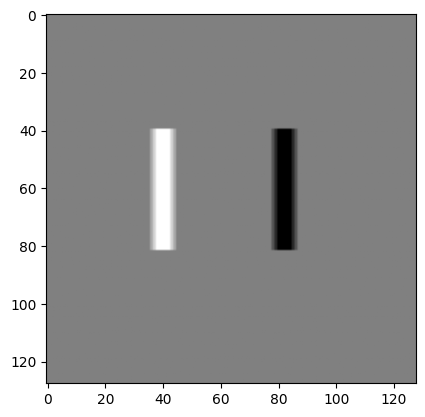

In [35]:
### use convolutions to blue/alter images using filters before trying the correlation attempts for image difference detection

# Create BPF
BPF = np.array((1, 1, 1, 0, 0, 0, 0, -1, -1, -1))

# Convolve
BPResult = signal.convolve2d(I, np.matrix(BPF), mode="same")

# Display your results, using its min and max value in gray scale.
plt.imshow(BPResult, cmap="gray", vmin = np.min(BPResult), vmax = np.max(BPResult))

In [38]:
print(BPResult)
BPResult_array = BPResult.flatten()
print(BPResult_array)
print(len(BPResult_array))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. ... 0. 0. 0.]
16384


note: when convolving the image with a filter, you should use mode = same because we want the image to stay the sam esize as before manipulation. 

In [ ]:
### correlation function
def corr_func(tx, th, x, h):
    """The Correlation Function
    The purpose of this function is to perform correlations.
    The function begins by determing dt by dubtracting two points in the time array
    Args:
        tx (array): time array for x function
        th (array): time array for impulse function
        x (array): array that represents x function
        h (array): array that represents h function 

    Returns:
        tc (array): time array of the correlation result
        yfinal3 (array): amplitude of the correlation result
    """
    # find dt
    dt = tx[1] - tx[0]

    # find left most time point
    l_x = tx[0]
    l_h = th[0]

    # find right most time point
    r_x = tx[-1]
    r_h = th[-1]
    
    ly = l_x - r_h # Left endpoint for Rxy
    ry = r_x - l_h # Right endpoint for Rxy

    # create t of convolved function using the variables above
    tc = np.arange(ly, ry + (dt/2), dt)
    y = np.ones(len(tc))
    y2 = np.convolve(x, np.flip(h), mode = "full")
    y_final = (y2 / np.max(y2))
    return tc, y_final

Goal One:
Convolving one image with another; Applying filter to images; Correlating image with one another with minute differences; Analyzing changes in correlation performance

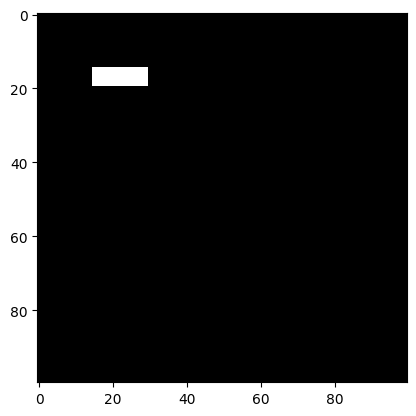

In [9]:
## creating an image
I_1 = np.zeros((100, 100))
I_1[15:20, 15:30] = 1  #upperrowlimit:bottomrow, extending to left,extending to right
plt.imshow(I_1, cmap="gray", vmin = np.min(I_1), vmax = np.max(I_1))

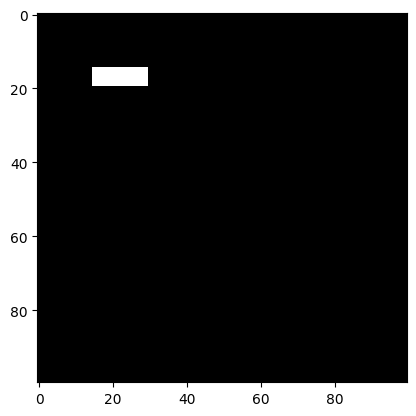

In [10]:
## creating an image
I_2 = np.zeros((100, 100))
I_2[15:20, 15:30] = 1  #upperrowlimit:bottomrow, extending to left,extending to right
plt.imshow(I_2, cmap="gray", vmin = np.min(I_2), vmax = np.max(I_2))

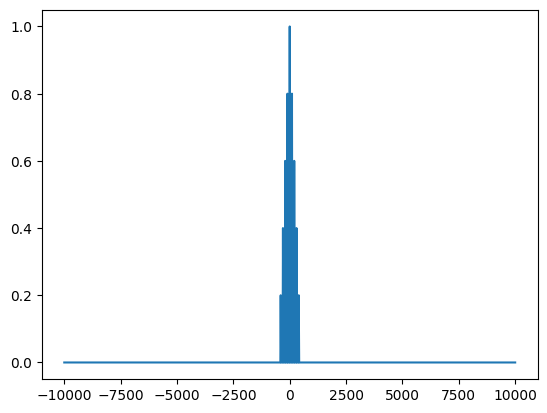

In [16]:
I_1_array = I_1.flatten()
I_2_array = I_2.flatten()

"""print(len(I_2_array))
print(len(I_1_array))"""

t_array = np.arange(0, len(I_1_array))
"""print(len(t_array))
print(t_array)"""

tc, ty = corr_func(t_array, t_array, I_1_array, I_2_array)
plt.plot(tc, ty)

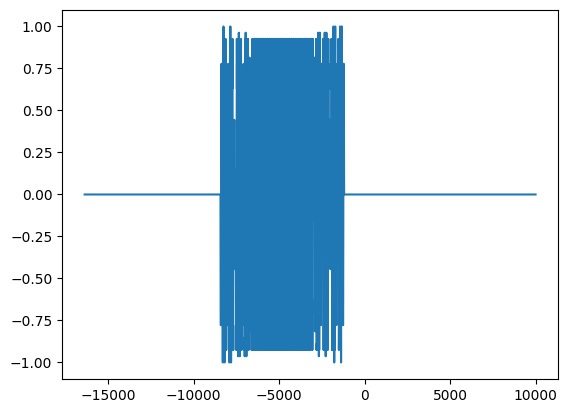

In [39]:
t_BPFarray = np.arange(0, len(BPResult_array))

tc, ty = corr_func(t_array, t_BPFarray, I_1_array, BPResult_array)
plt.plot(tc, ty)

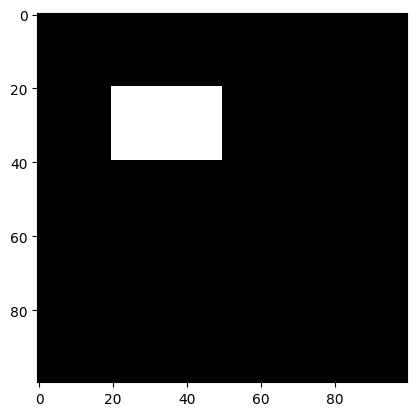

In [23]:
I_1 = np.zeros((100, 100))
I_1[20:40, 20:50] = 1  #upperrowlimit:bottomrow, extending to left,extending to right
plt.imshow(I_1, cmap="gray", vmin = np.min(I_1), vmax = np.max(I_1))

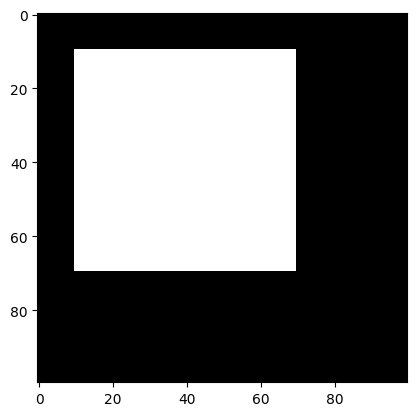

In [26]:
## creating an image
I_2 = np.zeros((100, 100))
I_2[10:70, 10:70] = 1  #upperrowlimit:bottomrow, extending to left,extending to right
plt.imshow(I_2, cmap="gray", vmin = np.min(I_2), vmax = np.max(I_2))

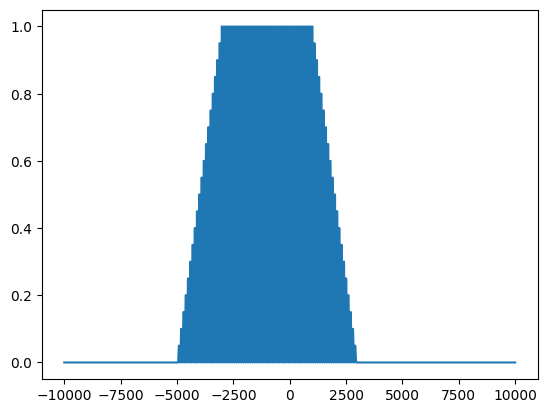

In [27]:
I_1_array = I_1.flatten()
I_2_array = I_2.flatten()

"""print(len(I_2_array))
print(len(I_1_array))"""

t_array = np.arange(0, len(I_1_array))
"""print(len(t_array))
print(t_array)"""

tc, ty = corr_func(t_array, t_array, I_1_array, I_2_array)
plt.plot(tc, ty)

Need code that will detect if pixels between two different images shifted or not. How can we go through the code and see what has shifted?

In [32]:
count = 0
pixel_differences = []

for i in range(0, len(I_1)):
    if I_1[i,i] == I_2[i,i]:
        pass
    else:
        pixel_differences.append(count)
    count += 1

print("The images are different at {} pixel indices".format(pixel_differences))

The images are different at [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69] pixel indices


In [ ]:
### how to cycle through the index values of the image without flattening to 2D array

### can we recover information for image after flattening the image?

    in lab work :) <3

In [44]:
import scipy.signal

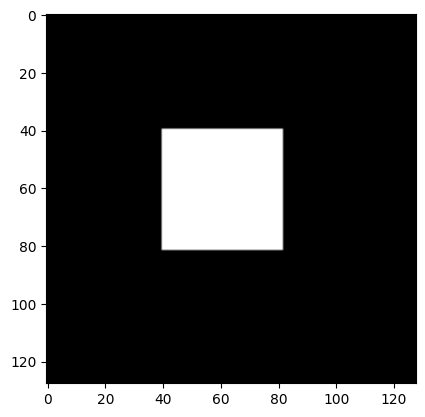

In [45]:
### working with the 2D array convolution

# Create I with 128x128 zeros
I = np.zeros((128, 128))   # create an array of zeros, first number is number or rows, second is number of columns
I[40:82, 40:82] = 1 # this alters the white sqaure added, makes it so pixels 40 to 82 are white 
# Display your I, using its vmin and vmax value in gray scale.
plt.imshow(I, cmap="gray", vmin = np.min(I), vmax = np.max(I)) # cmap = color map, "vmin" - , "vmax" - 

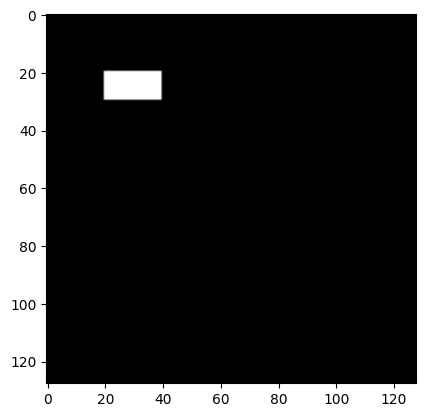

In [46]:
# Create I with 128x128 zeros
I2 = np.zeros((128, 128))   # create an array of zeros, first number is number or rows, second is number of columns
I2[20:30, 20:40] = 1 # this alters the white sqaure added, makes it so pixels 40 to 82 are white 
# Display your I, using its vmin and vmax value in gray scale.
plt.imshow(I2, cmap="gray", vmin = np.min(I2), vmax = np.max(I2)) # cmap = color map, "vmin" - , "vmax" - 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


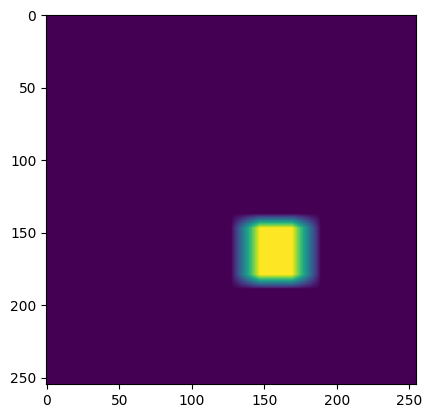

In [49]:
twoD_result = signal.correlate2d(I, I2, mode='full', boundary='fill', fillvalue=0)

plt.imshow(twoD_result)

print(twoD_result)

(array([6.1934e+04, 4.4000e+01, 1.1000e+02, 4.8000e+01, 4.4000e+01,
        1.3600e+02, 3.6000e+01, 9.4000e+01, 2.8000e+01, 2.8000e+01,
        1.3600e+02, 1.6000e+01, 9.4000e+01, 2.0000e+01, 1.6000e+01,
        1.3200e+02, 1.6000e+01, 7.8000e+01, 2.0000e+01, 1.2000e+01,
        1.2400e+02, 1.2000e+01, 8.6000e+01, 4.0000e+00, 1.6000e+01,
        1.1600e+02, 8.0000e+00, 7.4000e+01, 1.2000e+01, 8.0000e+00,
        1.1600e+02, 8.0000e+00, 7.0000e+01, 8.0000e+00, 4.0000e+00,
        1.1200e+02, 8.0000e+00, 6.6000e+01, 8.0000e+00, 0.0000e+00,
        1.1600e+02, 0.0000e+00, 7.0000e+01, 0.0000e+00, 0.0000e+00,
        1.1200e+02, 0.0000e+00, 6.6000e+01, 0.0000e+00, 7.5900e+02]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
        132., 136., 140., 144., 148., 152., 156., 160., 164., 168., 172.,
        176., 180., 18

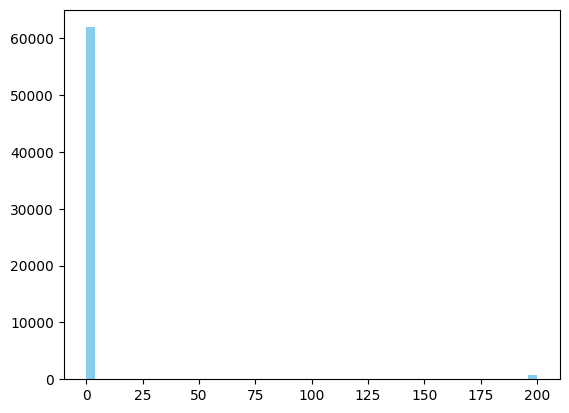

In [50]:
plt.hist(twoD_result.flatten(), bins=50, color='skyblue')